Tarea M35-AD – RUBEN TAMEZ

In [134]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [135]:
os.chdir('C:/Users/Rubén/Documents/DATA ANALIST/')
df = pd.read_csv('supermarket_sales.csv')
df.sample(1)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
147,568-90-5112,C,Naypyitaw,Normal,Male,Health and beauty,66.14,4,13.228,277.788,3/19/2019,12:46,Credit card,264.56,4.761905,13.228,5.6


In [136]:
# Generar estadística descriptiva básica en las columnas unit_price y quantity: Cálculo de la media, mediana, moda
def basic_statistics(df, column):
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode()[0]  # mode() returns a Series, take the first value
    return mean, median, mode
print("Estadísticas básicas de unit_price:", basic_statistics(df, 'Unit price'))
print("Estadísticas básicas de quantity:", basic_statistics(df, 'Quantity'))

Estadísticas básicas de unit_price: (55.67213, 55.230000000000004, 83.77)
Estadísticas básicas de quantity: (5.51, 5.0, 10)


In [137]:
# Obtener el ticket promedio:
print('Tiket promedio 1) por ciudad,')
for city in df['City'].unique():
    avg_ticket = df[df['City'] == city]['Total'].mean()
    print(f"Ticket promedio en {city}: {avg_ticket:.2f}")
print('\n')

Tiket promedio 1) por ciudad,
Ticket promedio en Yangon: 312.35
Ticket promedio en Naypyitaw: 337.10
Ticket promedio en Mandalay: 319.87




In [138]:
print('2) por product line y ciudad,')
for city in df['City'].unique():
    for product_line in df['Product line'].unique():
        avg_ticket = df[(df['City'] == city) & (df['Product line'] == product_line)]['Total'].mean()
        print(f"Ticket promedio en {city} para {product_line}: {avg_ticket:.2f}")

2) por product line y ciudad,
Ticket promedio en Yangon para Health and beauty: 268.04
Ticket promedio en Yangon para Electronic accessories: 305.29
Ticket promedio en Yangon para Home and lifestyle: 344.88
Ticket promedio en Yangon para Sports and travel: 328.35
Ticket promedio en Yangon para Food and beverages: 295.92
Ticket promedio en Yangon para Fashion accessories: 320.25
Ticket promedio en Naypyitaw para Health and beauty: 319.53
Ticket promedio en Naypyitaw para Electronic accessories: 344.89
Ticket promedio en Naypyitaw para Home and lifestyle: 308.79
Ticket promedio en Naypyitaw para Sports and travel: 350.27
Ticket promedio en Naypyitaw para Food and beverages: 360.10
Ticket promedio en Naypyitaw para Fashion accessories: 331.69
Ticket promedio en Mandalay para Health and beauty: 376.99
Ticket promedio en Mandalay para Electronic accessories: 310.03
Ticket promedio en Mandalay para Home and lifestyle: 350.98
Ticket promedio en Mandalay para Sports and travel: 322.39
Ticket p

In [139]:
print("3) por género,")
avg_ticket = df.groupby('Gender')['Total'].mean().round(2)
for gender in df['Gender'].unique():
    print(f"Ticket promedio de {gender}: {avg_ticket[gender]}")

3) por género,
Ticket promedio de Female: 335.1
Ticket promedio de Male: 310.79


In [140]:
print("4) por género y product line:")
for gender in df['Gender'].unique():
    for product_line in df['Product line'].unique():
        avg_ticket = df[(df['Gender'] == gender) & (df['Product line'] == product_line)]['Total'].mean()
        print(f"Ticket promedio en {gender} para {product_line}: {avg_ticket:.2f}")

4) por género y product line:
Ticket promedio en Female para Health and beauty: 290.02
Ticket promedio en Female para Electronic accessories: 322.64
Ticket promedio en Female para Home and lifestyle: 380.21
Ticket promedio en Female para Sports and travel: 324.71
Ticket promedio en Female para Food and beverages: 368.57
Ticket promedio en Female para Fashion accessories: 317.06
Ticket promedio en Male para Health and beauty: 348.10
Ticket promedio en Male para Electronic accessories: 316.69
Ticket promedio en Male para Home and lifestyle: 294.14
Ticket promedio en Male para Sports and travel: 340.36
Ticket promedio en Male para Food and beverages: 273.50
Ticket promedio en Male para Fashion accessories: 291.08


In [141]:
# Usar el método rank para generar top 5 de:
# 1) ventas por ciudad,
for city in df['City'].unique():
    top_sales = df[df['City'] == city].groupby('Product line')['Total'].sum().nlargest(5)
    print(f"Top 5 ventas en {city}:\n{top_sales}\n")

Top 5 ventas en Yangon:
Product line
Home and lifestyle        22417.1955
Sports and travel         19372.6995
Electronic accessories    18317.1135
Food and beverages        17163.1005
Fashion accessories       16332.5085
Name: Total, dtype: float64

Top 5 ventas en Naypyitaw:
Product line
Food and beverages        23766.8550
Fashion accessories       21560.0700
Electronic accessories    18968.9745
Health and beauty         16615.3260
Sports and travel         15761.9280
Name: Total, dtype: float64

Top 5 ventas en Mandalay:
Product line
Sports and travel         19988.1990
Health and beauty         19980.6600
Home and lifestyle        17549.1645
Electronic accessories    17051.4435
Fashion accessories       16413.3165
Name: Total, dtype: float64



In [142]:
# 2) ventas por member,
for member in df['Customer type'].unique():
    top_sales = df[df['Customer type'] == member].groupby('Product line')['Total'].sum().nlargest(5)
    print(f"Top 5 ventas para {member}:\n{top_sales}\n")

Top 5 ventas para Member:
Product line
Food and beverages     31357.6200
Sports and travel      28234.3005
Home and lifestyle     27978.0270
Fashion accessories    26323.9620
Health and beauty      25831.0395
Name: Total, dtype: float64

Top 5 ventas para Normal:
Product line
Electronic accessories    29839.0365
Fashion accessories       27981.9330
Sports and travel         26888.5260
Home and lifestyle        25883.8860
Food and beverages        24787.2240
Name: Total, dtype: float64



In [143]:
#3) ventas por payment. Obtener además el % de aporte de cada categoría. P.ej. La ciudad X aporta con el 25% del total de ventas, etc.
for payment in df['Payment'].unique():
    total_sales = df['Total'].sum()
    payment_sales = df[df['Payment'] == payment]['Total'].sum()
    percentage = (payment_sales / total_sales) * 100
    print(f"Ventas con {payment}: {payment_sales:.2f} ({percentage:.2f}% del total)")

Ventas con Ewallet: 109993.11 (34.06% del total)
Ventas con Cash: 112206.57 (34.74% del total)
Ventas con Credit card: 100767.07 (31.20% del total)


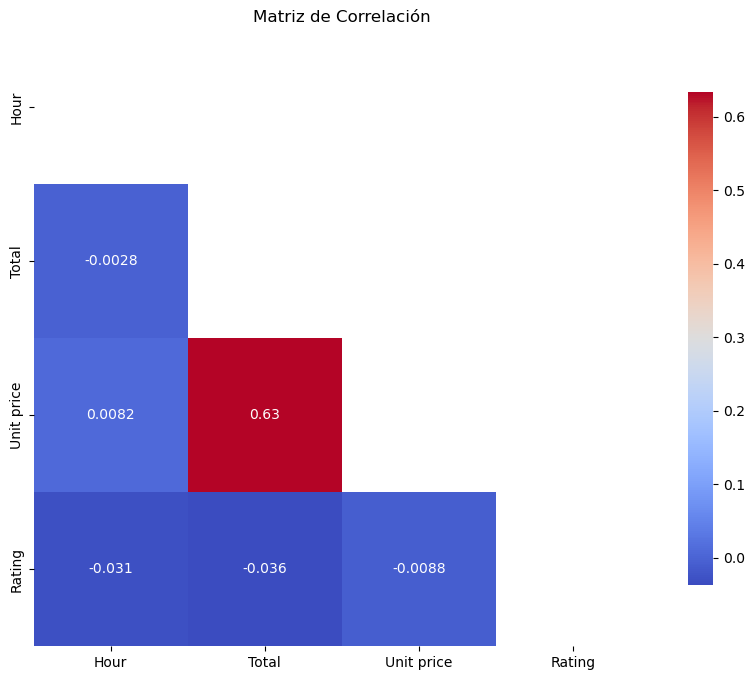

In [146]:
# Cálculo de una matriz de correlación entre la hora (sin minutos) y el total, y otra que correlacione el unit_price con el rating de la transacción, para validar si los productos más caros son los que dejan más margen

# Crear la columna 'Hour' a partir de la columna 'Time'
if 'Hour' not in df.columns:
	df['Hour'] = df['Time'].str.split(':').str[0].astype(int)

corr_matrix = df[['Hour', 'Total', 'Unit price', 'Rating']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, mask=np.triu(corr_matrix))
plt.title('Matriz de Correlación')
plt.show()